##Linear regression

The linear regression model makes a number of assumptions about the data, including 

- **Homoscedasticity of residuals**
- **Normal distribution of residuals**
- **Lack of multicollinearity among features**
- **Independence of the observations (For example, independence assumption violated if data is a time series)**

Since the results of the regression model depend on these statistical assumptions, the 
results of the regression model are only correct if our assumptions hold (at least approximately).

<br>

The following exercise explores two datasets: `prestige` and `ccard`. Below is a description of the 2 datasets.

* `prestige`
    - Prediction of the prestige of a job
    - Dependent variable: `prestige`
    - Independent variables: `income`, `education`
   
* `ccard`
    - Prediction of the average credit card expenditure
    - Dependent variable: `AVGEXP`
    - Independent variables: `AGE`, `INCOME`, `INCOMESQ` (`INCOME^2`), `OWNRENT`

###Loading the prestige and ccard dataset

In [29]:
import statsmodels.api as sm
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
credit_card = sm.datasets.ccard.load_pandas().data
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.stats as ss
import statsmodels.graphics as graphics

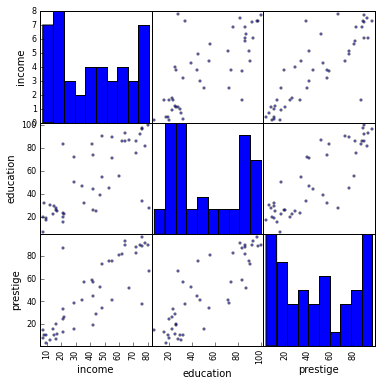

In [30]:
scatter_matrix(prestige, figsize=(6,6))
plt.show()
#exploring prestige dataset

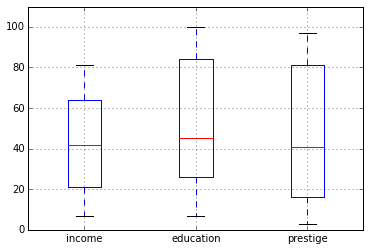

In [31]:
prestige.boxplot()
plt.ylim(0, 110)
plt.show()

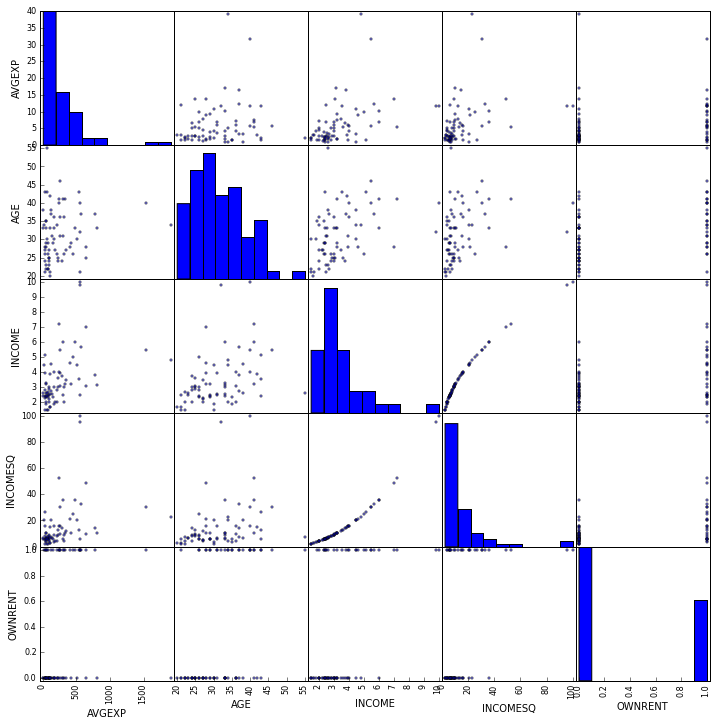

In [32]:
scatter_matrix(credit_card, figsize=(12,12))
plt.show()

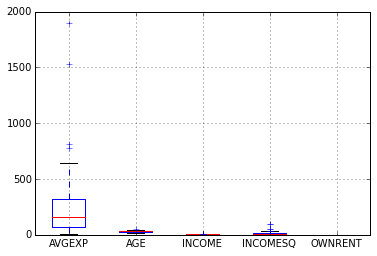

In [33]:
credit_card.boxplot()
plt.show()
#scatter matrix shows quadratic relationship between income and income^2

In [34]:
import statsmodels.api as sms
# prestige
y = prestige['prestige']
x = prestige[['income', 'education']]
p_model = sms.OLS(y, x).fit()
summary = p_model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     377.6
Date:                Fri, 28 Aug 2015   Prob (F-statistic):           5.30e-28
Time:                        14:59:30   Log-Likelihood:                -180.04
No. Observations:                  45   AIC:                             364.1
Df Residuals:                      43   BIC:                             367.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
income         0.5483      0.116      4.743      0.000         0.315     0.781
education      0.4958      0.093      5.343      0.000         0.309     0.683
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.366
Skew:                           0.219   Prob(JB):                        0.833
Kurtosis:                       3.055   Cond. No.                         5.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# credit card
y = credit_card['AVGEXP']
x = credit_card[['AGE', 'INCOME', 'INCOMESQ', 'OWNRENT']]
c_model = sms.OLS(y, x).fit()
summary = c_model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AVGEXP   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     20.22
Date:                Fri, 28 Aug 2015   Prob (F-statistic):           5.24e-11
Time:                        14:59:30   Log-Likelihood:                -507.24
No. Observations:                  72   AIC:                             1022.
Df Residuals:                      68   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AGE           -6.8112      4.551     -1.497      0.139       -15.892     2.270
INCOME       175.8245     63.743      2.758      0.007        48.628   303.021
INCOMESQ      -9.7235      6.030     -1.613      0.111       -21.756     2.309
OWNRENT       54.7496     80.044      0.684      0.496      -104.977   214.476
==============================================================================
Omnibus:                       76.325   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.447
Skew:                           3.194   Prob(JB):                    9.42e-142
Kurtosis:                      16.255   Cond. No.                         87.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Plot the studentized residuals against the fitted y values. Why do we need to use the studentized residuals as opposed to just
   the residuals?
   
   **Hint:** 
   - Use the `outlier_test` function to get the studentized residuals 
   - `model.outlier_test()['student_resid']`  # `model` refers to the fitted model using ols in statsmodels
   

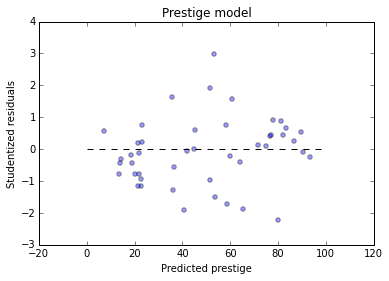

In [36]:
# studentized residuals are plotted here because they are
# standardized by the standard error.

student_resid = p_model.outlier_test()['student_resid']
fitted_y = p_model.fittedvalues
plt.scatter(fitted_y, student_resid, alpha=0.4)
plt.title('Prestige model')
plt.xlabel('Predicted prestige')
plt.ylabel('Studentized residuals')
plt.hlines(0, 0, 100, linestyles='dashed')
plt.show()

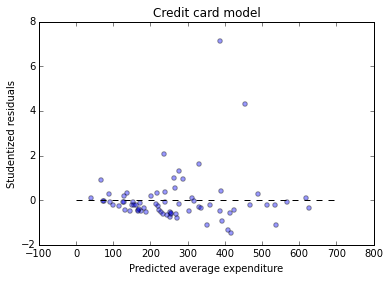

In [37]:
student_resid = c_model.outlier_test()['student_resid']
fitted_y = c_model.fittedvalues
plt.scatter(fitted_y, student_resid, alpha=0.4)
plt.hlines(0, 0, 700, linestyles='dashed')
plt.xlabel('Predicted average expenditure')
plt.ylabel('Studentized residuals')
plt.title('Credit card model')
plt.show()

In [38]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

y = prestige['prestige']
x = prestige[['income', 'education']]

fstat, pval = sm.stats.diagnostic.het_goldfeldquandt(y, x)[:2]
print 'prestige model: p-value for hetero', pval

y = credit_card['AVGEXP']
x = credit_card[['AGE', 'INCOME', 'INCOMESQ', 'OWNRENT']]

fstat, pval = sm.stats.diagnostic.het_goldfeldquandt(y, x)[:2]
print 'credit card model: p-value for hetero', pval

# Under the Goldfeld-Quandt test, the credit card model is more likely
# to have heteroscedasticity (non-uniformly distributed variance).

prestige model: p-value for hetero 0.953963281622
credit card model: p-value for hetero 0.163026166582


Took the log of the response variable and refit the data.
   
   **Other more advanced methods to treat heteroscedasticity:**
   - Stratify the data and build multiple models (e.g. `low expenditure` and `high expenditure` models)
   - [Robust regression models](http://en.wikipedia.org/wiki/Robust_regression#Heteroscedastic_errors).

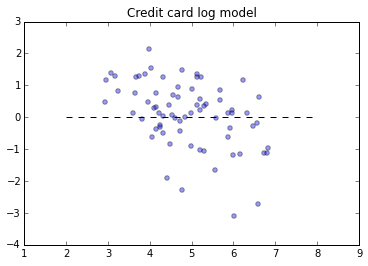

credit card model: p-value for hetero 0.984665260004


In [39]:
# credit card
import math
y = credit_card['AVGEXP'].apply(lambda x: math.log(x))
x = credit_card[['AGE', 'INCOME', 'INCOMESQ', 'OWNRENT']]
clog_model = sms.OLS(y, x).fit()

student_resid = clog_model.outlier_test()['student_resid']
fitted_y = clog_model.fittedvalues
plt.scatter(fitted_y, student_resid, alpha=0.4)
plt.hlines(0, 2, 8, linestyles='dashed')
plt.title('Credit card log model')
plt.show()

# the studentized residual plot is a bit better and more random
# the goldfeld-quandt test supports that

fstat, pval = sm.stats.diagnostic.het_goldfeldquandt(y, x)[:2]
print 'credit card model: p-value for hetero', pval

Create QQplot to check if residuals are normally distributed. It plots the quantile of the normal distribution against that of the studentized residuals and checks for alignment of the quantiles. Also use the [**Jarque-Bera**](http://en.wikipedia.org/wiki/Normality_test) test (already in model summary) to evaluate normality of the residuals. Apply the `log` transform to `AVGEXP` in `ccard` and repeat the plot and the JB test.

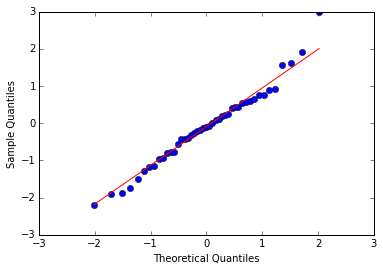

In [40]:
#prestige model
student_resid = p_model.outlier_test()['student_resid']
sm.graphics.qqplot(student_resid, line='s')
plt.show()

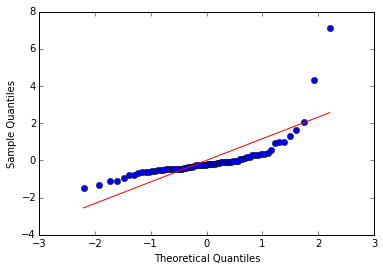

In [41]:
#credit card model
student_resid = c_model.outlier_test()['student_resid']
sm.graphics.qqplot(student_resid, line='s')
plt.show()

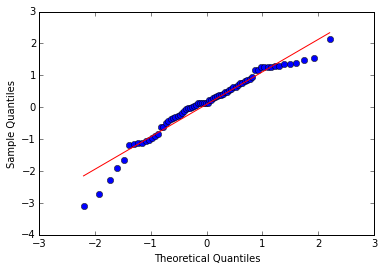

In [42]:
# credit card model after taking log of response variable
student_resid = clog_model.outlier_test()['student_resid']
sm.graphics.qqplot(student_resid, line='s')
plt.show()
# after log transformation, the qqplot is a lot more normal looking

Measure **multicollinearity**  and its effect on beta coefficients by examining the **Condition Number** (included in model summary). As a rule of thumb, a condition number > 30 indicates multicollinearity between the features.
   
   Measure 
   [**Variance Inflation Factor (VIF)**](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html#statsmodels.stats.outliers_influence.variance_inflation_factor) 
   to see how collinear a particular feature is with the rest of the features. As a rule of thumb, a VIF > 10 indicates 
   the feature is collinear with at least another feature.
   
   **Hint:**
   - `variance_inflation_factor` takes a matrix of features (numpy matrix, not pandas dataframe) and the column index of the
     feature the VIF is to be calculated
   - Write a function that loops through and calculates the VIF for each of the features
   

In [43]:
d_c = dict()

for i in range(len(x.columns)):
    d_c[x.columns[i]] = ss.outliers_influence.variance_inflation_factor(x.as_matrix(), i)

d_p = dict()

x = prestige[['income', 'education']]

for i in range(len(x.columns)):
    d_p[x.columns[i]] = ss.outliers_influence.variance_inflation_factor(x.as_matrix(), i)

print d_c, d_p

{'INCOMESQ': 16.751357340627997, 'AGE': 18.80323323554143, 'OWNRENT': 2.1205720422891394, 'INCOME': 52.577599135439549} {'education': 7.6813866433828411, 'income': 7.6813866433828411}


####Detecting outliers since linear regression is very sensitive to those

In [44]:
# need to install plotly - pip install plotly
import plotly.plotly as py
py.sign_in('wlau88', '7ql4pvy5w4')

In [45]:
student_resid = p_model.outlier_test()['student_resid']
fitted_y = p_model.fittedvalues
fig = plt.figure()
plt.scatter(fitted_y, student_resid)
py.iplot_mpl(fig)

#plot of x variables with respect to studentized residuals

In [46]:
x_income = prestige['income']
x_education = prestige['education']
fig = plt.figure()
plt.scatter(x_income, student_resid, label='Income')
py.iplot_mpl(fig)

In [47]:
fig = plt.figure()
plt.scatter(x_education, student_resid, label='Education')
py.iplot_mpl(fig)

With outliers and their sources, we can see the [influential](http://onlinestatbook.com/2/regression/influential.html) outliers that skew the model significantly (i.e. the model (betas) changes drastically upon removal of these points).  Below is the 
   [influence plot](http://statsmodels.sourceforge.net/devel/generated/statsmodels.graphics.regressionplots.influence_plot.html#statsmodels.graphics.regressionplots.influence_plot)
   and the outliers, the influential points, and the outliers with high influence (the most potent combination!). 

   To get a better sense of influence, you can read about leverage [here](http://en.wikipedia.org/wiki/Leverage_%28statistics%29).

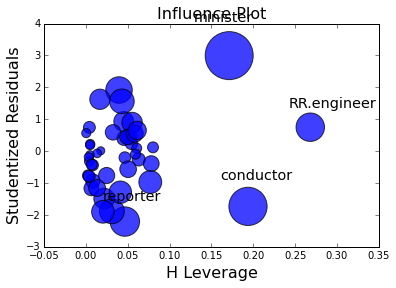

In [48]:
graphics.regressionplots.influence_plot(p_model)
plt.show()

Remove the influential (high leverage) points and re-fit the model. Describe the differences 
   you observe in the beta coefficients of the new model.

In [49]:
prestige_dl = prestige.drop(['minister', 'RR.engineer', 'conductor'], axis=0)
y = prestige_dl['prestige']
x = prestige_dl[['income', 'education']]
p_model = sms.OLS(y, x).fit()
student_resid = p_model.outlier_test()['student_resid']
fitted_y = p_model.fittedvalues
fig = plt.figure()
plt.scatter(fitted_y, student_resid)
py.iplot_mpl(fig)
# the studentized residuals plot is a lot more homoscedastic.

In [50]:
p_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     458.4
Date:                Fri, 28 Aug 2015   Prob (F-statistic):           2.66e-28
Time:                        14:59:37   Log-Likelihood:                -162.12
No. Observations:                  42   AIC:                             328.2
Df Residuals:                      40   BIC:                             331.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
income         0.8831      0.155      5.702      0.000         0.570     1.196
education      0.2294      0.120      1.914      0.063        -0.013     0.472
==============================================================================
Omnibus:                        1.699   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.570
Skew:                          -0.447   Prob(JB):                        0.456
Kurtosis:                       2.687   Cond. No.                         8.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# With respect to the betas, income determines prestige more. r^2 also better.